In [1]:
#Geopandas installation
import sys
'geopandas' in sys.modules
!pip install geopandas

In [2]:
#we import the data of both Italy, Covid and new_regions
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

italy = gpd.read_file('reg2011_g.shp')
new_regions = pd.read_csv('reg2011_g.csv')


In [3]:
#We substitute the right column containing regions
italy['NOME_REG'] = new_regions['NOME_REG']
italy.head(20)

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,Aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,Trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."
5,6,Friuli-Venezia Giulia,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270..."
6,7,Liguria,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257..."
7,8,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723..."
8,9,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553..."
9,10,Umbria,6.203152e+05,8.464008e+09,"MULTIPOLYGON (((771407.451 4833282.073, 771402..."


In [4]:
f_path = "C:/Users/alex/Downloads/dataset_all_2.csv"
df =  pd.read_csv(f_path)
df.Territorio.unique()

array(['Piemonte', "Valled'Aosta", 'Lombardia', 'Trentino-AltoAdige',
       'Veneto', 'Friuli-VeneziaGiulia', 'Liguria', 'Emilia-Romagna',
       'Toscana', 'Umbria', 'Marche', 'Lazio', 'Abruzzo', 'Molise',
       'Campania', 'Puglia', 'Basilicata', 'Sicilia', 'Sardegna'],
      dtype=object)

In [5]:
df.Territorio = df.Territorio.replace(["Valled'Aosta"], 'Aosta' )
df.Territorio = df.Territorio.replace(["Trentino-AltoAdige"], 'Trentino' )
df.Territorio = df.Territorio.replace(["Friuli-VeneziaGiulia"], 'Friuli-Venezia Giulia' )
df_download_media = df[df.Tipo == "Download"]

import re
m = []
for i in range(0, len(df_download_media)):
    m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_download_media.iloc[i].Media)[0].replace(',','.')))

df_download_media["media_f"] = m
df_download_media.groupby(["Territorio","Anno"]).sum().reset_index()['Misure']

df_download_media_somma = df_download_media.groupby(["Territorio","Anno"]).sum().reset_index().drop(['Unnamed: 0','media_f'],axis = 1)

df_download_media_somma['misure_totali_anno'] = df_download_media_somma['Misure']
df_download_media_somma = df_download_media_somma.drop('Misure',axis = 1)
df_download_media_somma

C:\Users\alex\AppData\Local\Temp\ipykernel_14708\2792175464.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download_media["media_f"] = m


,Territorio,Anno,misure_totali_anno
0,Abruzzo,2014,936791
1,Abruzzo,2015,838078
2,Abruzzo,2016,186903
3,Abruzzo,2017,132121
4,Abruzzo,2018,173836
...,...,...,...
160,Veneto,2018,194459
161,Veneto,2019,161566
162,Veneto,2020,88449
163,Veneto,2021,49269


In [6]:
df_download_media = df_download_media.merge(df_download_media_somma, on=['Territorio','Anno'], how='left').reset_index()
df_download_media['media_f'] = df_download_media['media_f'] * df_download_media['Misure'] / df_download_media['misure_totali_anno']
df_download_media

,index,Unnamed: 0,Operatore,Profilo,Velocità (down/up),Territorio,Periodo,Tipo,Media,Dev. Std.,Min,Max,TP%,Misure,Anno,media_f,misure_totali_anno
0,0,0,BritishTelecom,"BTADSL7Mega,VipPremium,VipDuet,VipAssolo","\n7,0Mbps832.0kbps\n",Piemonte,\nGen2014Giu2014\n,Download,"6,1Mbps","34,3","6,0Mbps","6,1Mbps",NaN,40340,2014,0.272739,902233
1,1,3,BritishTelecom,"VipClub7Mega,VipSmart7Mega,VipDuet,VipAssolo","\n7,0Mbps1,0Mbps\n",Piemonte,\nGen2014Giu2014\n,Download,"5,9Mbps","68,5","5,8Mbps","6,0Mbps",NaN,42096,2014,0.275280,902233
2,2,6,Eolo,None,"\n7,0Mbps384.0kbps\n",Piemonte,\nGen2014Giu2014\n,Download,"6,0Mbps","1059,8","4,0Mbps","6,8Mbps",NaN,37320,2014,0.248184,902233
3,3,9,Eolo,Formula,"\n7,0Mbps512.0kbps\n",Piemonte,\nGen2014Giu2014\n,Download,"6,7Mbps","386,9","6,1Mbps","6,9Mbps",NaN,28013,2014,0.208025,902233
4,4,14,Fastweb,"Superjet,Joy,Jet","\n10,0Mbps10,2Mbps\n",Piemonte,\nGen2014Giu2014\n,Download,"9,4Mbps","163,9","9,4Mbps","9,4Mbps",NaN,38340,2014,0.399449,902233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,3599,11649,TIM,TIMSuperADSL,"\n10,0Mbps1,0Mbps\n",Sardegna,\nLug2022Dic2022\n,Download,"9,8Mbps","616,7","9,8Mbps",NaN,NaN,2635,2022,0.169184,152633
3600,3600,11652,TIM,TIMSuperMega,"\n30,0Mbps3,0Mbps\n",Sardegna,\nLug2022Dic2022\n,Download,"29,6Mbps","3,1","29,6Mbps",NaN,NaN,8127,2022,1.576063,152633
3601,3601,11655,Tiscali,None,"\n100,0Mbps20,0Mbps\n",Sardegna,\nLug2022Dic2022\n,Download,"66,1Mbps","3168,9","64,4Mbps",NaN,NaN,7200,2022,3.118068,152633
3602,3602,11658,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n8,0Mbps512.0kbps\n",Sardegna,\nLug2022Dic2022\n,Download,"6,9Mbps","333,8","6,9Mbps",NaN,NaN,8986,2022,0.406225,152633


In [7]:
df_download_media = df_download_media.drop(["Unnamed: 0","Profilo","Velocità (down/up)","Operatore","Periodo","Tipo","Media","Dev. Std.","Min","Max","TP%","Misure"],axis = 1)

df_download_media = df_download_media.groupby(["Territorio","Anno"]).sum().reset_index()
df_download_media['NOME_REG'] = df_download_media['Territorio']
df_download_media = df_download_media.drop(['index','misure_totali_anno'],axis = 1)
df_download_media

,Territorio,Anno,media_f,NOME_REG
0,Abruzzo,2014,7.234012,Abruzzo
1,Abruzzo,2015,7.443062,Abruzzo
2,Abruzzo,2016,9.124112,Abruzzo
3,Abruzzo,2017,9.115773,Abruzzo
4,Abruzzo,2018,8.784971,Abruzzo
...,...,...,...,...
160,Veneto,2018,10.511426,Veneto
161,Veneto,2019,12.589614,Veneto
162,Veneto,2020,20.475254,Veneto
163,Veneto,2021,27.843985,Veneto


In [8]:
#merging the two datasets
merge = italy.merge(df_download_media[df_download_media["Anno"] == 2021], on='NOME_REG', how='left')

merge


,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Territorio,Anno,media_f
0,1,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",Piemonte,2021.0,37.323861
1,2,Aosta,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",Aosta,2021.0,54.126173
2,3,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",Lombardia,2021.0,114.513777
3,4,Trentino,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",Trentino,2021.0,36.366585
4,5,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",Veneto,2021.0,27.843985
5,6,Friuli-Venezia Giulia,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270...",Friuli-Venezia Giulia,2021.0,16.949796
6,7,Liguria,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",Liguria,2021.0,39.929271
7,8,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",Emilia-Romagna,2021.0,18.935525
8,9,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",Toscana,2021.0,53.695176
9,10,Umbria,6.203152e+05,8.464008e+09,"MULTIPOLYGON (((771407.451 4833282.073, 771402...",Umbria,2021.0,237.143394


2014


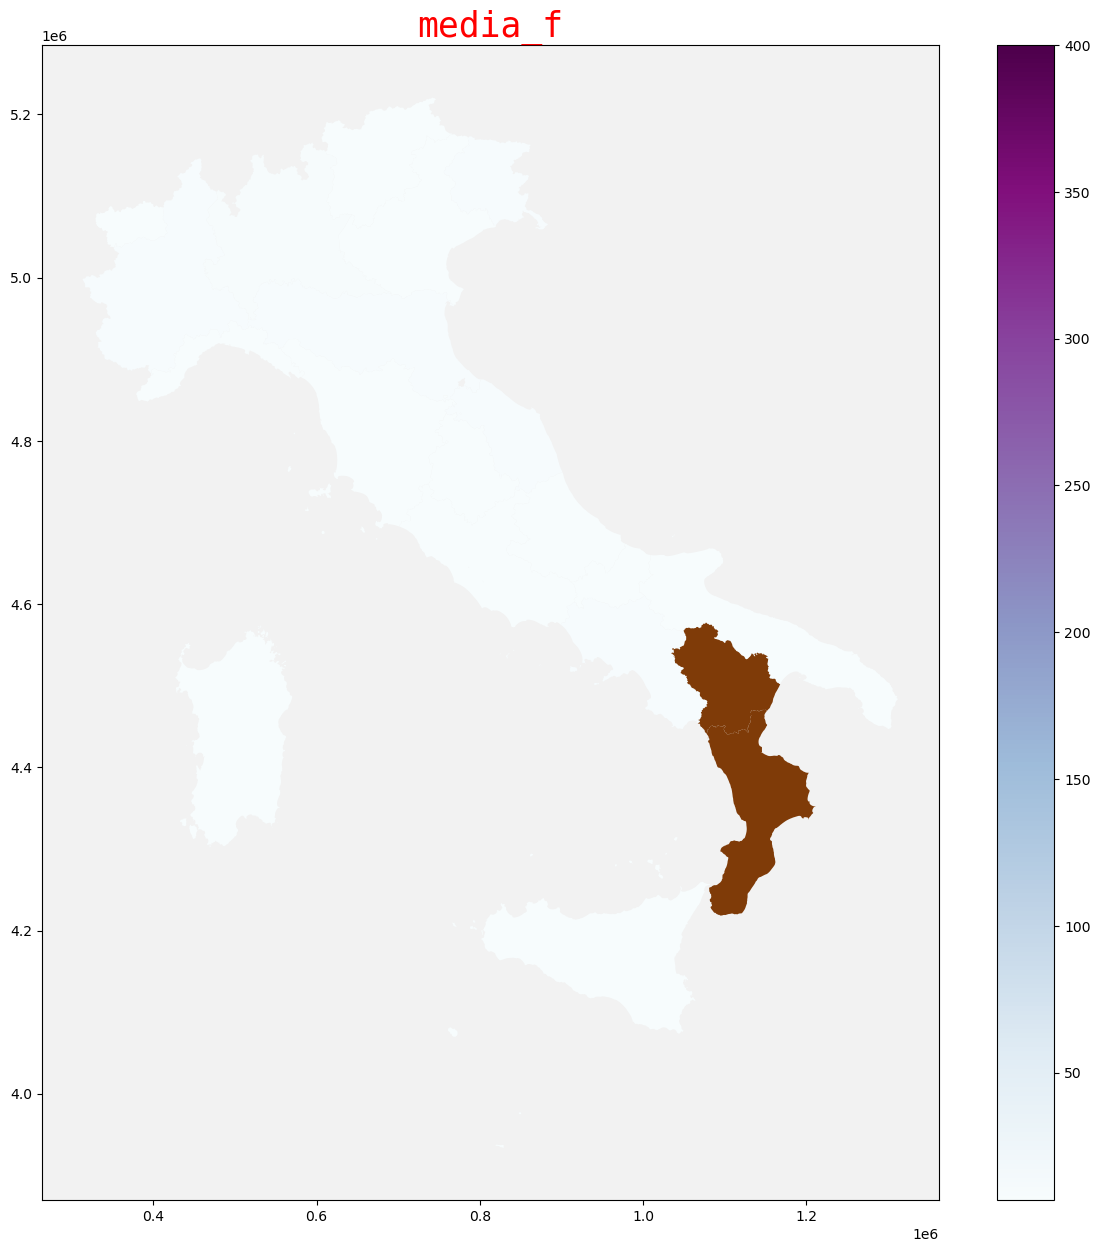

2015


<Figure size 640x480 with 0 Axes>

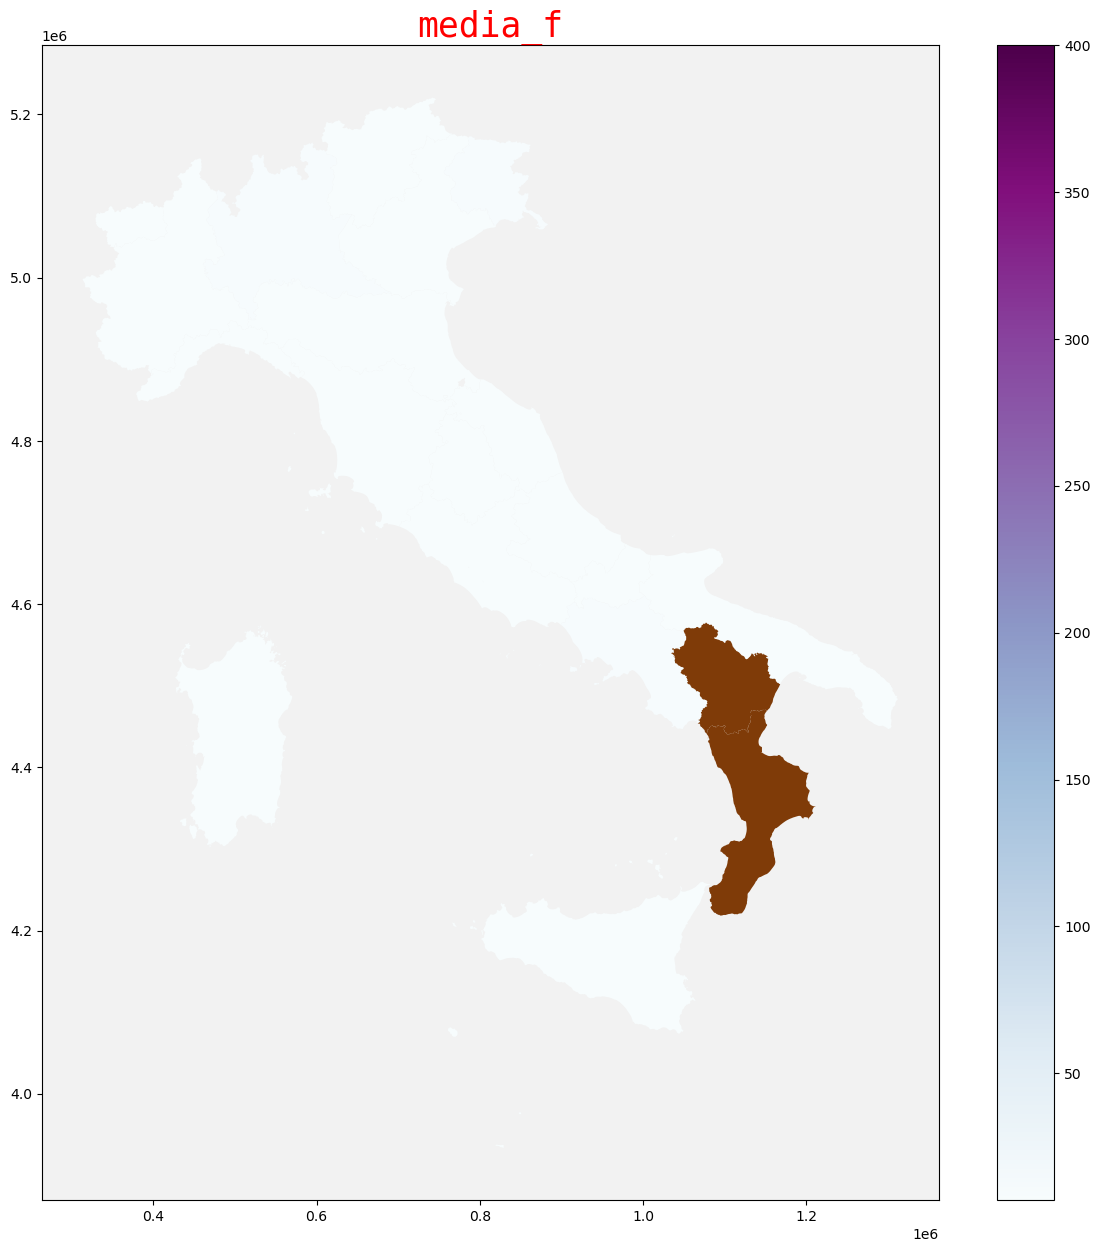

2016


<Figure size 640x480 with 0 Axes>

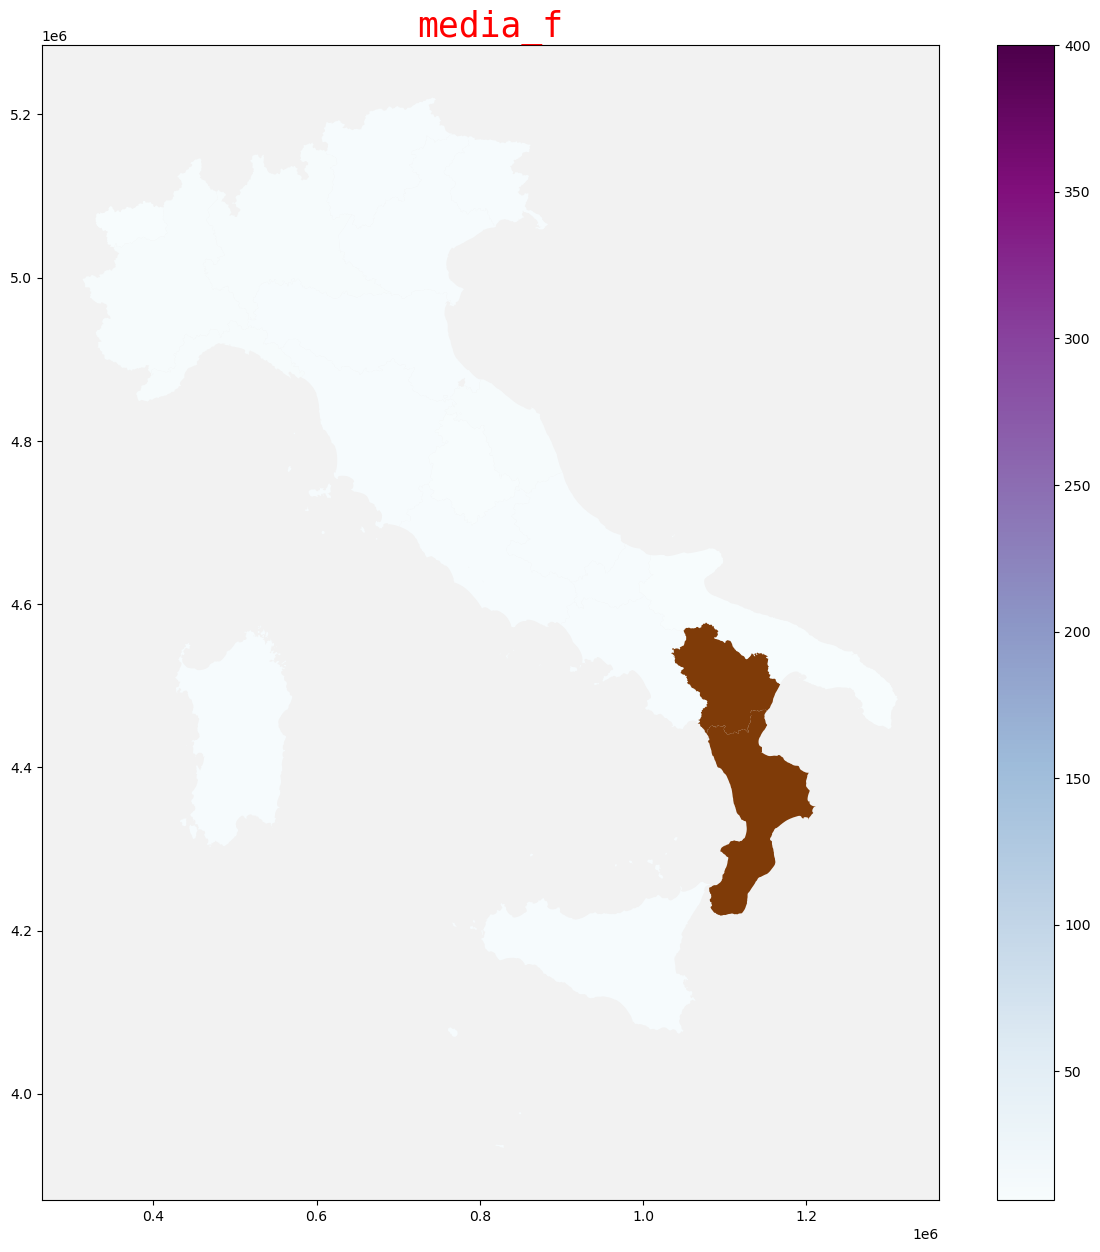

2017


<Figure size 640x480 with 0 Axes>

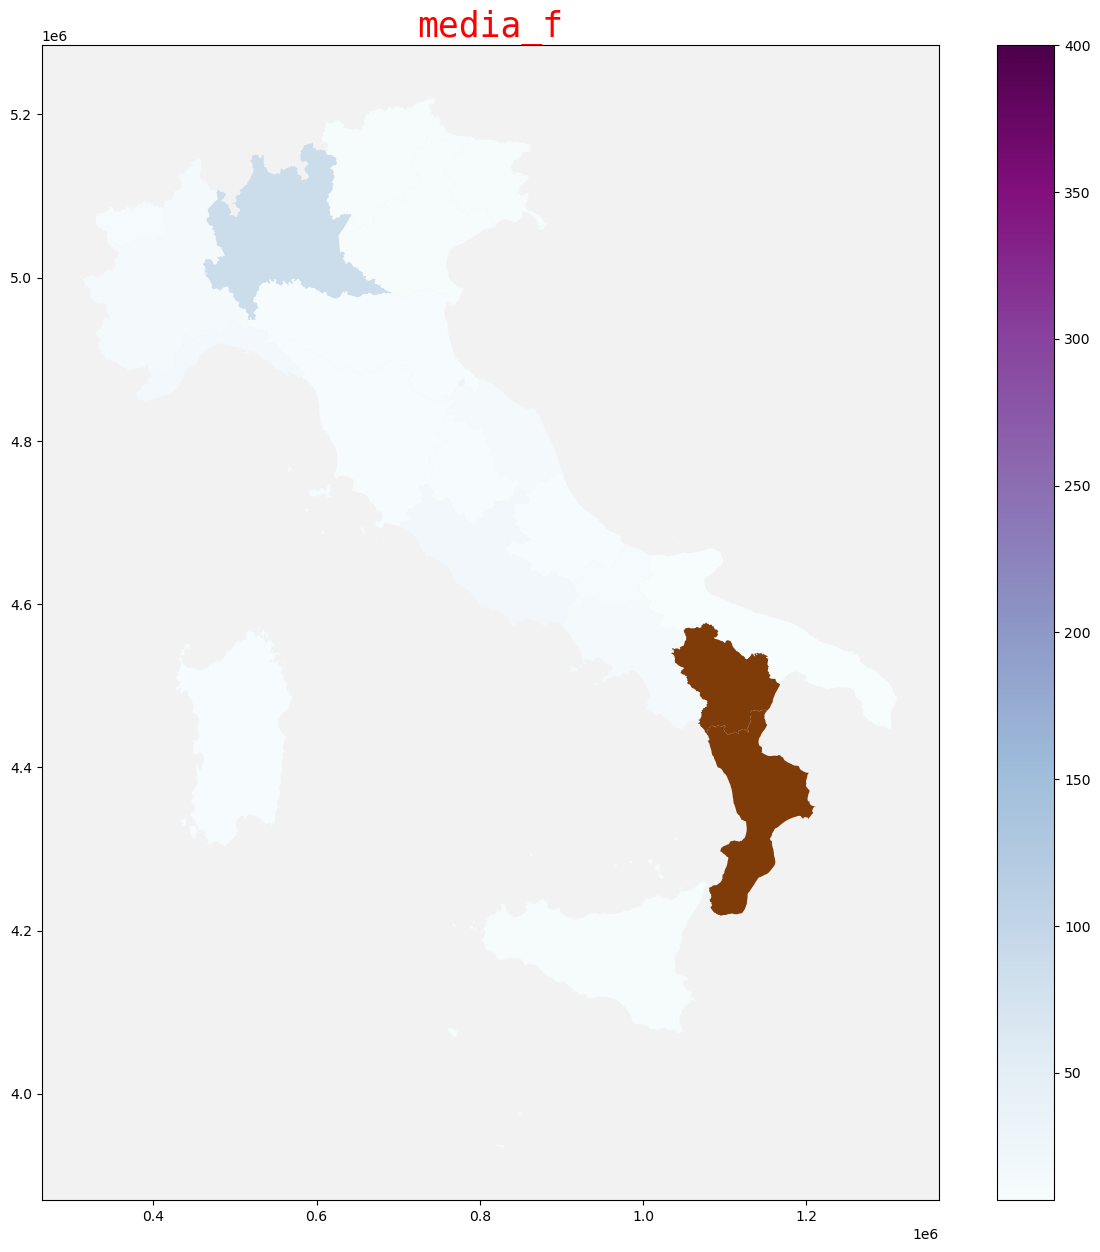

2018


<Figure size 640x480 with 0 Axes>

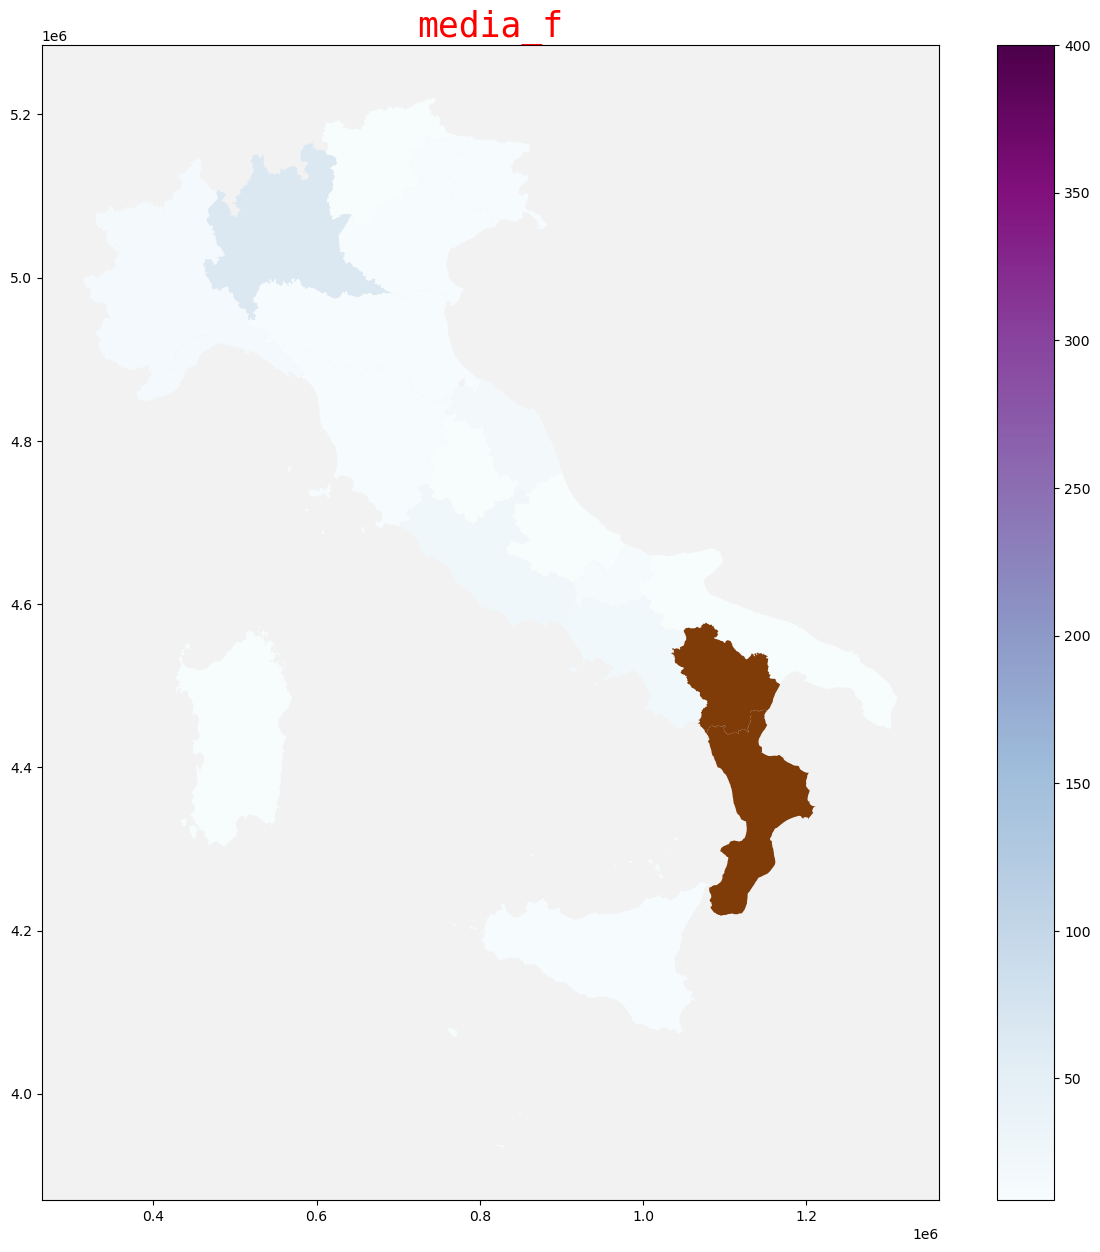

2019


<Figure size 640x480 with 0 Axes>

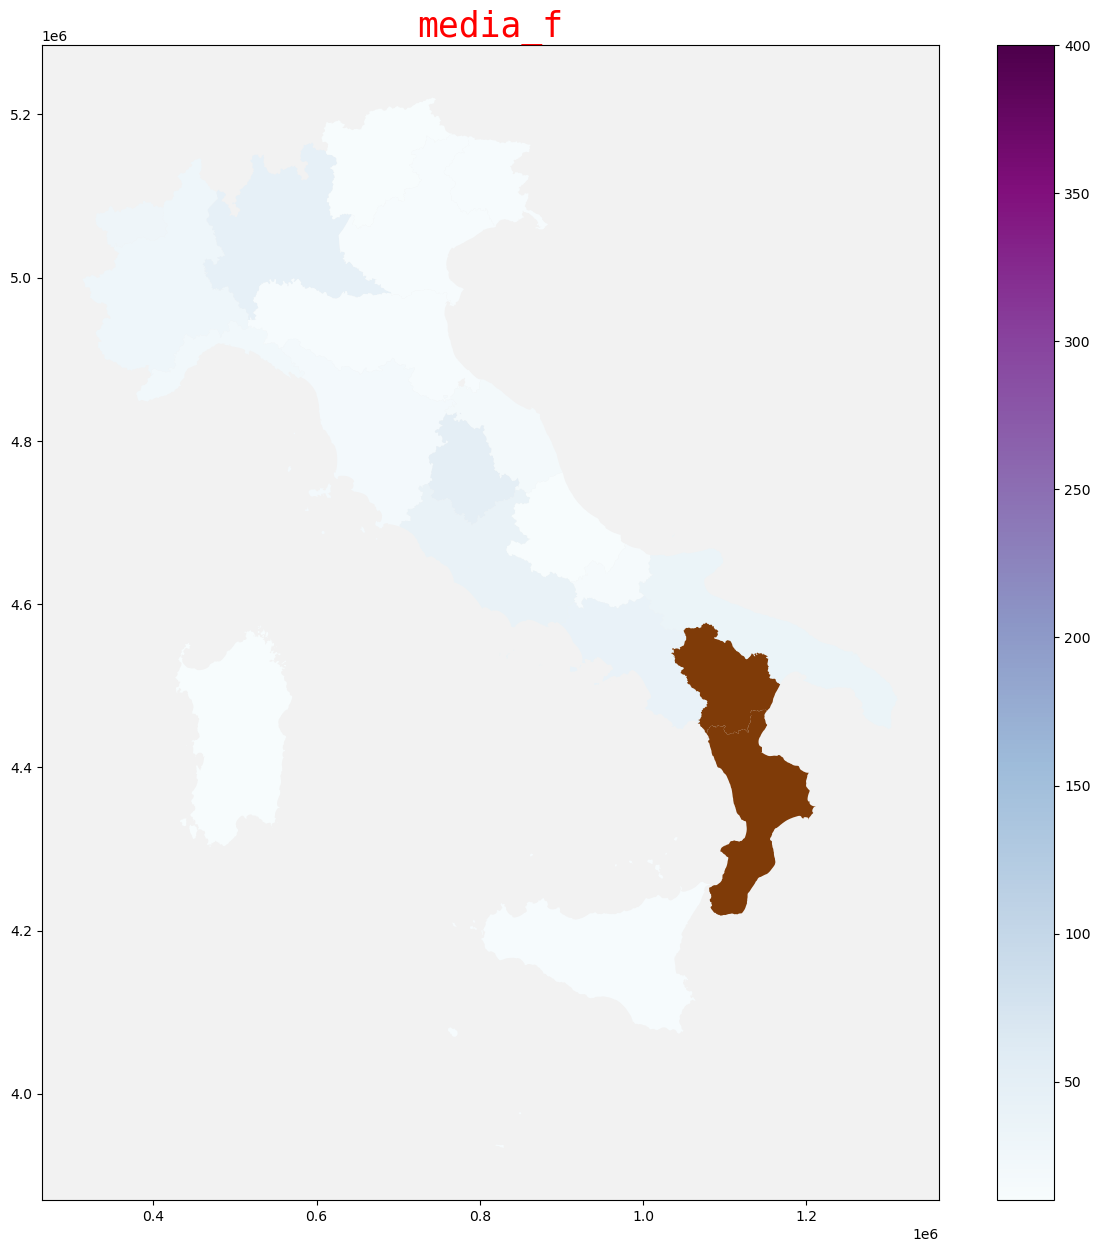

2020


<Figure size 640x480 with 0 Axes>

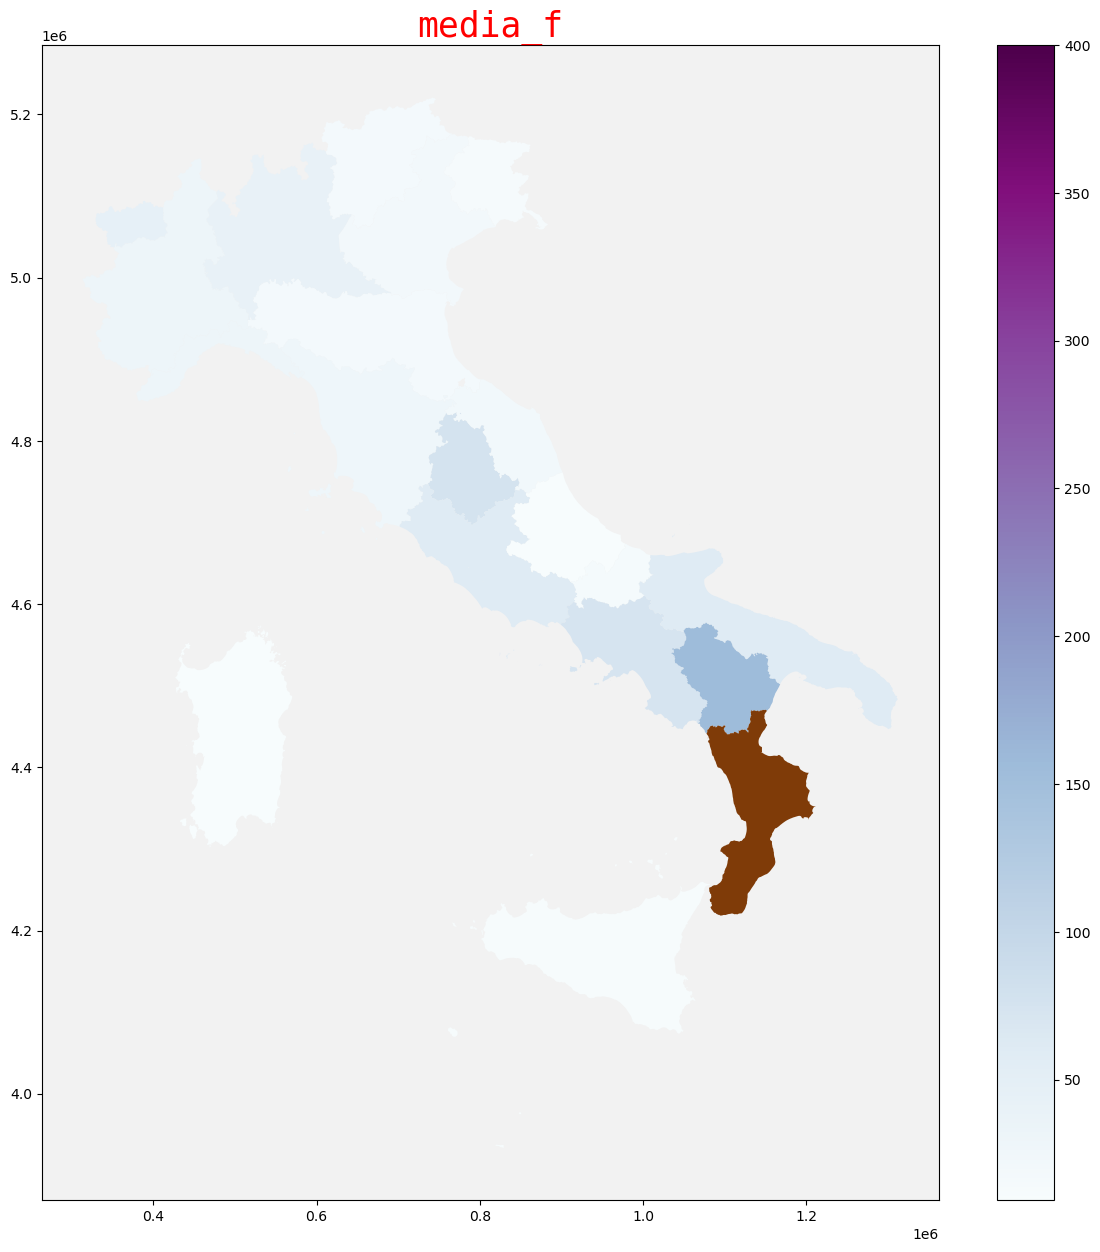

2021


<Figure size 640x480 with 0 Axes>

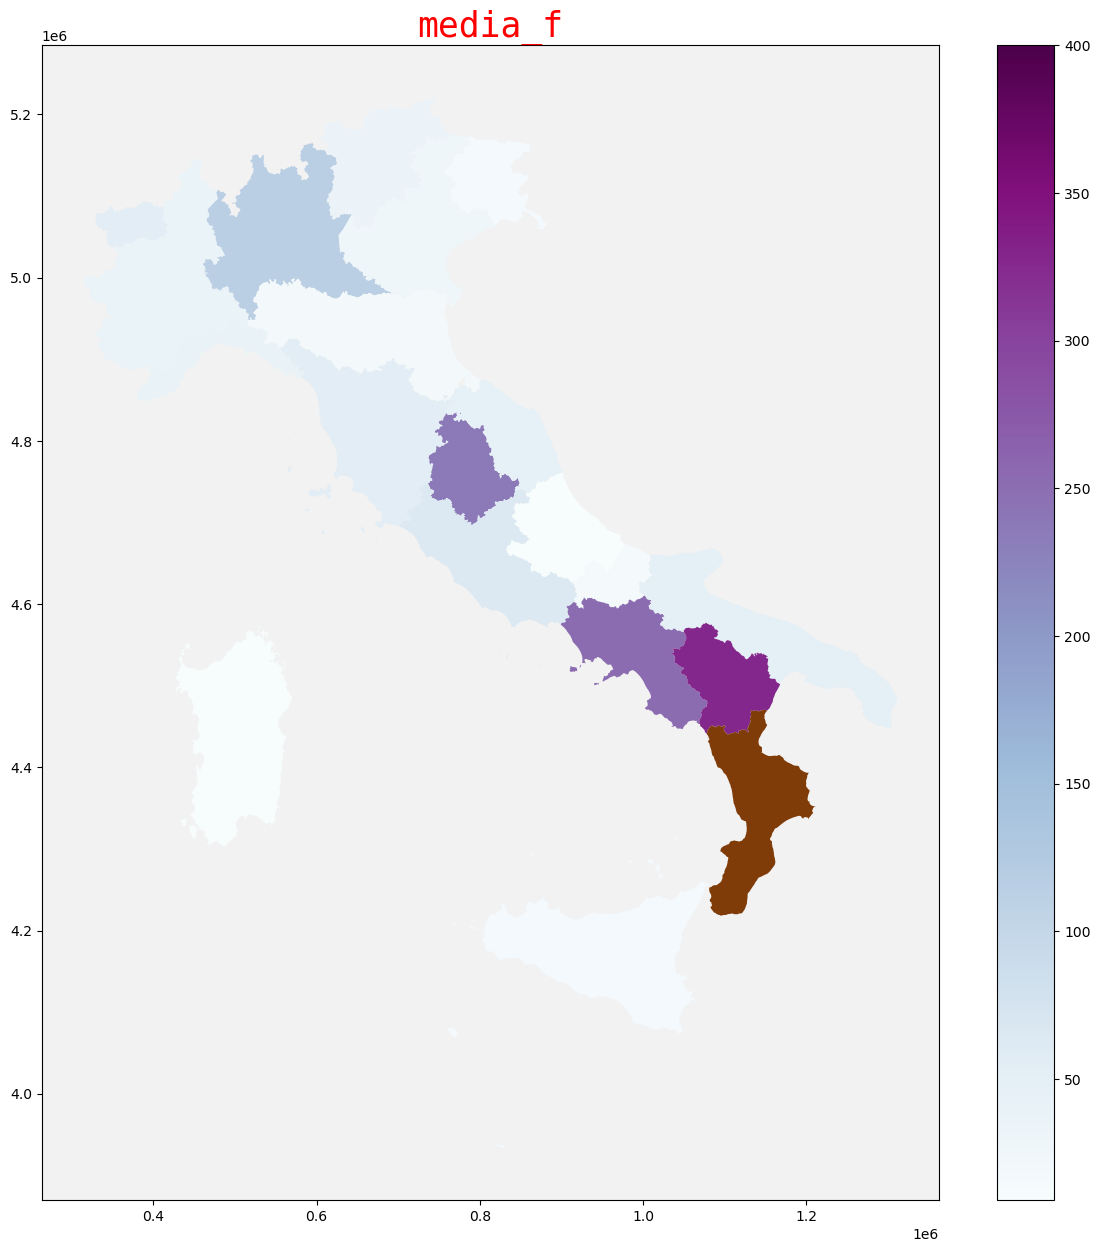

2022


<Figure size 640x480 with 0 Axes>

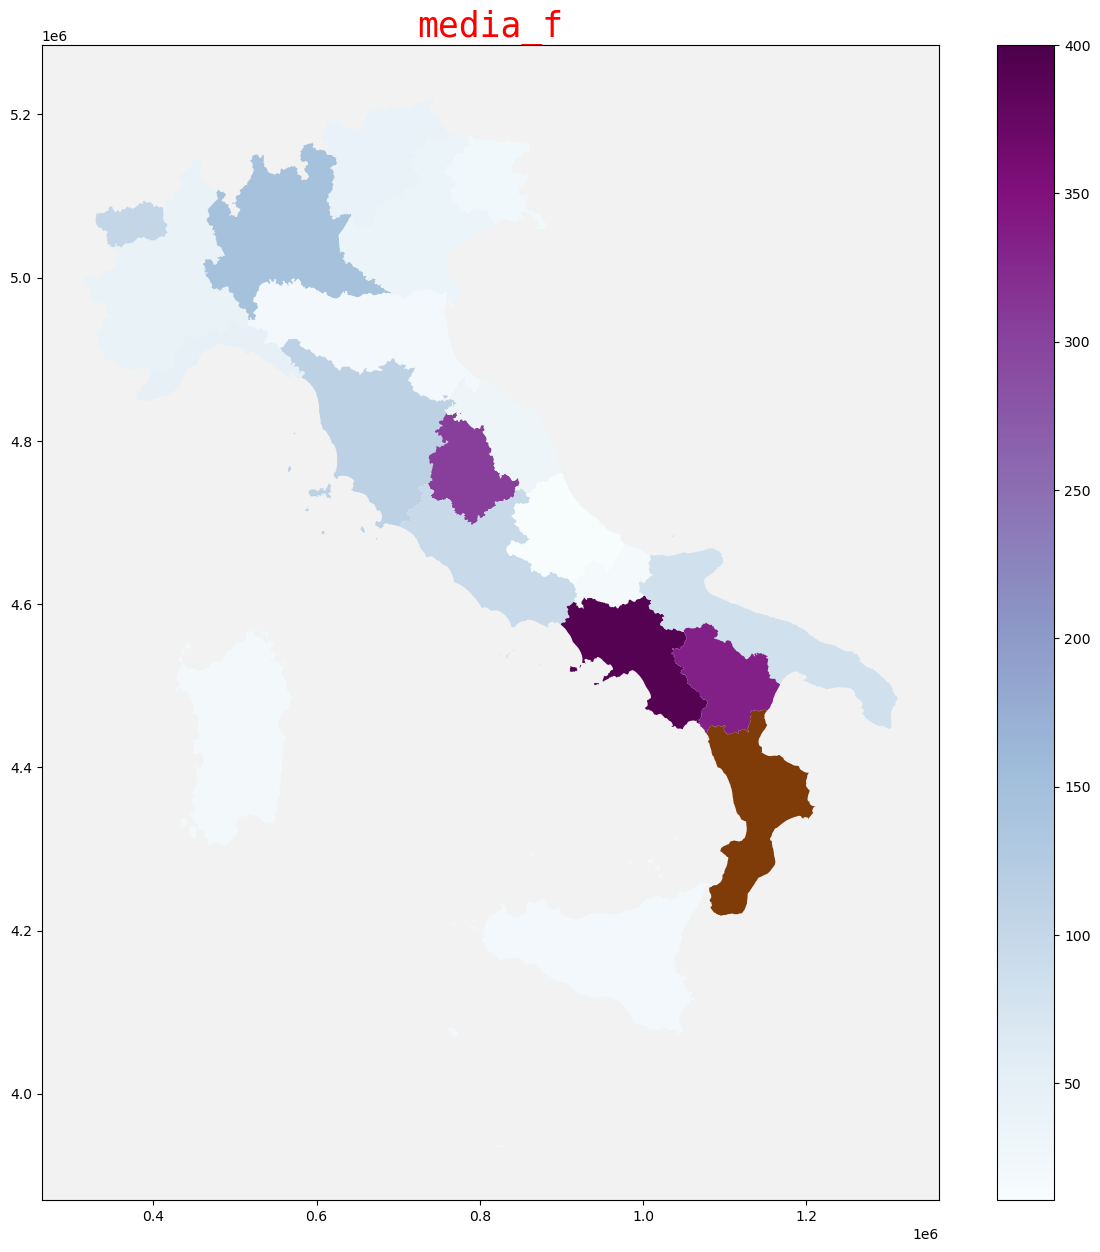

<Figure size 640x480 with 0 Axes>

In [10]:

anni = df_download_media["Anno"].unique()
for anno in anni:
    print(anno)
    merge = italy.merge(df_download_media[df_download_media["Anno"] == anno], on='NOME_REG', how='left')

    fig, ax = plt.subplots(1, figsize=(15, 15))
    ax.set_facecolor("#F2F2F2")
    col = 'media_f'
    merge.loc[20] = [0,'Artificial_min',0,0,None,None,0,0]
    merge.loc[20] = [0,'Artificial_max',0,0,None,None,0,400]
    ax.set_title(col, fontdict={'fontsize':'25', 'fontweight':'3'}, color='Red', fontfamily='monospace')
    my_plot = merge.plot(ax=ax,
               column=col,
               cmap='BuPu',
               label='ciao',
               legend=True,
               categorical=False)
    #colore diverso per dati mancanti
    if anno < 2020:
        merge.loc[16,'media_f'] = 100
        
        my_plot = merge[merge.NOME_REG == 'Basilicata'].plot(
        ax=ax,
        column=col,
        cmap='PuOr',
        label='ciao',
        legend=False,
        categorical=True
    )
    merge.loc[17,'media_f'] = 100
    
    my_plot = merge[merge.NOME_REG == 'Calabria'].plot(
        ax=ax,
        column=col,
        cmap='PuOr',
        label='ciao',
        legend=False,
        categorical=True
    )
    fig = my_plot.get_figure()
    fig.savefig("italia_" + str(anno) +".png")
    plt.show()
    plt.clf()